In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
hex_scheduled = _hex_json.loads("false")

In [ ]:
hex_user_email = _hex_json.loads("\"example-user@example.com\"")

In [ ]:
hex_user_attributes = _hex_json.loads("{}")

In [ ]:
hex_run_context = _hex_json.loads("\"logic\"")

In [ ]:
hex_timezone = _hex_json.loads("\"Etc/UTC\"")

In [ ]:
hex_project_id = _hex_json.loads("\"01980be8-1744-711a-bb35-d1e55564b712\"")

In [ ]:
hex_project_name = _hex_json.loads("\"Regression Analysis - Modeling Monthly Gross Orders\"")

In [ ]:
hex_status = _hex_json.loads("\"Exploratory\"")

In [ ]:
hex_categories = _hex_json.loads("[]")

In [ ]:
hex_color_palette = _hex_json.loads("[\"#FC8D62\",\"#66C2A5\",\"#8DA0CB\",\"#E78AC3\",\"#A6D854\",\"#FFD92F\",\"#E5C494\",\"#B3B3B3\"]")

Define the Problem:

Objective: The goal of this project is to (1) identify key drivers of monthly gross orders and (2) build a robust forecast model that predicts total gross orders per month.

Key Metrics:
- Total Gross Orders per Month
- Discount and Pricing Incentives
- Marketing Spends
- Other customer journey related metrics



In [ ]:
# import jinja2
# raw_query = """
#     select distinct model_powertrain
#     from commercial.demand_planning.rep_vehicles
#     where vehicle_generation = 'GEN-2'
#     
# """
# sql_query = jinja2.Template(raw_query).render(vars())

Here I've added two filters which will allow us to see forecast based on specific model_powertrains and or see gross orders monthly vs weekly

In [ ]:
import json as _hex_json

wip_time_aggregation_selection = _hex_json.loads("\"order_month\"")

In [ ]:
import json as _hex_json

import json as _hex_json
model_powertrain_selection = _hex_pks.kernel_execution.input_cell.run_multiselect_dynamic(args=_hex_types.MultiselectDynamicArgs.from_dict({**_hex_json.loads("{\"options_variable_name\":\"dataframe\",\"dataframe_column\":\"model_powertrain\",\"display_dataframe_column\":null,\"ui_selected_values\":[\"R1S Dual Standard\",\"R1T Dual Standard\"],\"select_all\":false,\"max_option_count\":10000,\"max_option_bytes\":5242880}"), **{_hex_json.loads("\"options_variable\""):_hex_kernel.variable_or_none("dataframe", scope_getter=lambda: globals())}}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

First pull in all discount related data related to each order starting from 2024-06-06 (beginning of GEN-2). This table allows us to see all orders in our order history and whether they had a discount (using total_discount column)

## Relationship between Discounts and Total Orders per Month



All Pricing Data in Order History

In [ ]:
# import jinja2
# raw_query = """
#     with forecast_versions_distinct as
#     (
#     select
#     distinct
#     forecast_version
#     , forecast_version_year
#     from finance.gross_margin.rep_revenue_vin
#     where 1=1
#     ),
#     
#     forecast_versions_ranked as
#     (
#     select
#     *
#     , row_number() over (
#         order by 
#         forecast_version_year is not null
#         , forecast_version_year desc
#         , case 
#             when forecast_version is null then 0
#             when forecast_version = '12+0' then 1
#             when forecast_version = '9+3' then 2
#             when forecast_version = '6+6' then 3
#             when forecast_version = '3+9' then 4
#             when forecast_version = '0+12' then 5
#             else 6
#         end asc
#     ) as forecast_version_rank
#     from forecast_versions_distinct
#     where 1=1
#     ), 
#     
#     order_level_ranked as
#     (
#     select
#     row_number() over(partition by rrv.oms_order_id order by fvr.forecast_version_rank) as order_level_rank
#     , fvr.forecast_version_rank
#     , rrv.*
#     from finance.gross_margin.rep_revenue_vin rrv
#     left join forecast_versions_ranked fvr
#     on (rrv.forecast_version = fvr.forecast_version or (rrv.forecast_version is null and fvr.forecast_version is null))
#     and (rrv.forecast_version_year = fvr.forecast_version_year or (rrv.forecast_version_year is null and fvr.forecast_version_year is null))
#     where 1=1
#     order by
#     rrv.dw_order_created_date desc
#     , fvr.forecast_version_rank asc
#     ),
#     
#     order_level_deduplicated as
#     (
#     select
#     *
#     from order_level_ranked
#     where 1=1
#     and order_level_rank = 1
#     order by
#     dw_order_created_date desc
#     , order_level_rank asc
#     ),
#     
#     order_level_normalized as
#     (
#     select
#     oms_order_id as order_id
#     , cast(coalesce(revenue,0) as double) as revenue
#     , cast(coalesce(base_price + options,0) as double) as total_price
#     , cast(coalesce(base_price,0) as double) as base_price
#     , cast(coalesce(options,0) as double) as options_price
#     , cast(coalesce(abs(total_discount),0) as double) as total_discount
#     , cast(coalesce(referral_discount,0) as double) as referral_discount
#     , cast(coalesce(price_adjustments,0) as double) as price_adjustments
#     , cast(coalesce(lease_down_payment_credit,0) as double) as lease_down_payment_credit
#     , cast(coalesce(lease_subvention,0) as double) as lease_subvention
#     , cast(coalesce(apr_subvention,0) as double) as apr_subvention
#     from order_level_deduplicated
#     where 1=1
#     order by
#     dw_order_created_date desc
#     ),
#     
#     order_level as
#     (select
#     o.order_id
#     , trunc(o.order_date,'month') as order_month
#     , trunc(o.order_date,'quarter') as order_quarter
#     , trunc(o.order_date,'week') as order_week
#     , o.order_date
#     , o.model_powertrain
#     , n.revenue
#     , n.total_price
#     , n.base_price
#     , n.options_price
#     , n.total_discount
#     , n.referral_discount
#     , n.price_adjustments
#     , n.lease_down_payment_credit
#     , n.lease_subvention
#     , n.apr_subvention
#     , case
#         when o.payment_type is null then 'Cash'
#         else o.payment_type
#         end as payment_type
#     , o.country
#     from commercial.demand_planning.rep_orders o
#     left join order_level_normalized n
#     on o.order_id = n.order_id
#     where 1=1
#     and o.order_type = 'Order'
#     and o.vehicle_generation = 'GEN-2'
#     and o.order_date >= '2024-06-06'
#     and o.model_powertrain in ({{model_powertrain_selection | array}})
#     order by o.order_date desc
#     )
#     
#     select * from order_level
# """
# sql_query = jinja2.Template(raw_query).render(vars())

After ingesting the data, we will aggregate it to a monthly level. For instance on 2026-06 there were 1000 orders, and on avaerage there were $500 in discount incentives.

In [ ]:
# import jinja2
# raw_query = """
#     -- select 
#     -- order_month, 
#     -- count(distinct order_id) as total_orders_per_month_per_model_powertrain,
#     -- ROUND(AVG(total_discount),0) as avg_total_discount_per_month
#     -- from eda_discounts_df
#     -- where 1=1
#     -- group by order_month
#     -- order by order_month asc
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
# eda_discounts_df_copy = eda_discounts_df.copy()
# # eda_agg_discounts_df_copy
# if wip_time_aggregation_selection == 'order_week':
#     eda_agg_discounts_df_copy = (
#     eda_discounts_df_copy.groupby("order_week")
#     .agg(
#         total_orders_per_week_per_model_powertrain=("order_id", "nunique"),
#         avg_total_discount_per_week=("total_discount", "mean"),
#     )
#     .reset_index()
# )
#     eda_agg_discounts_df_copy["avg_total_discount_per_week"] = eda_agg_discounts_df_copy["avg_total_discount_per_week"].round(0)
# elif wip_time_aggregation_selection == 'order_month':
#     eda_agg_discounts_df_copy = (
#     eda_discounts_df_copy.groupby("order_month")
#     .agg(
#         total_orders_per_month_per_model_powertrain=("order_id", "nunique"),
#         avg_total_discount_per_month=("total_discount", "mean"),
#     )
#     .reset_index()
# )
#     eda_agg_discounts_df_copy["avg_total_discount_per_month"] = eda_agg_discounts_df_copy["avg_total_discount_per_month"].round(0)






In [ ]:
eda_discounts_df_copy = eda_discounts_df.copy()
# eda_agg_discounts_df_copy
if wip_time_aggregation_selection == 'order_week':
    eda_agg_discounts_df_copy = (
    eda_discounts_df_copy.groupby("order_week")
    .agg(
        total_orders_per_week_per_model_powertrain=("order_id", "nunique"),
        avg_total_discount_per_week=("total_discount", "mean"),
    )
    .reset_index()
)
    eda_agg_discounts_df_copy["avg_total_discount_per_week"] = eda_agg_discounts_df_copy["avg_total_discount_per_week"].round(0)
elif wip_time_aggregation_selection == 'order_month':
    eda_agg_discounts_df_copy = (
    eda_discounts_df_copy.groupby("order_month")
    .agg(
        total_orders_per_month_per_model_powertrain=("order_id", "nunique"),
        avg_total_discount_per_month=("total_discount", "mean"),
    )
    .reset_index()
)
    eda_agg_discounts_df_copy["avg_total_discount_per_month"] = eda_agg_discounts_df_copy["avg_total_discount_per_month"].round(0)

eda_agg_discounts_df = eda_agg_discounts_df_copy.copy()



In [ ]:
eda_agg_discounts_df

In [ ]:
# import pandas as pd
# import numpy as np

# # --- 1. Define the parameters for the dataset ---
# num_months = 15
# start_date = '2024-06-01'

# # --- 2. Create the 'order_month' column ---
# # 'MS' frequency creates dates for the start of each month
# order_months = pd.date_range(start=start_date, periods=num_months, freq='MS')

# # --- 3. Generate fake 'total_orders' data with some seasonality ---
# # Base orders between 1500 and 3500
# base_orders = np.random.randint(1500, 3500, size=num_months)
# # Add a holiday season spike (e.g., for Nov/Dec)
# seasonal_spike = [1000 if month.month in [11, 12] else 0 for month in order_months]
# total_orders = base_orders + seasonal_spike

# # --- 4. Generate fake 'avg_total_discount' data with an upward trend ---
# # Create a steadily increasing base discount, then add some random noise
# base_discounts = np.linspace(300, 9000, num=num_months)
# random_noise = np.random.randint(-500, 500, size=num_months)
# avg_discounts = base_discounts + random_noise
# # Ensure no negative discounts and round to one decimal place
# avg_discounts = np.maximum(0, avg_discounts).round(1)

# # --- 5. Create the final DataFrame ---
# fake_df = pd.DataFrame({
#     'order_month': order_months.strftime('%Y-%m-%d'),
#     'total_orders_per_month_per_model_powertrain': total_orders,
#     'avg_total_discount_per_month': avg_discounts
# })

After aggregating the data, we can create a line chart to observe how both orders per month and average discount have behaved over time, and if they follow a similar trend. 

Generally we are obse3rving a trend where noth total orders and average discount follow the same trend; if average discounts for the month icnrease, we also see an increase in total orders.

Although we've identified a visual trend we can also prove this by calculating the two's correlation as well.

hex_cell_01989c5a-6b42-7ddf-a8a0-8996364124c1.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(eda_agg_discounts_df["order_month"], rotation=45, ha="right")


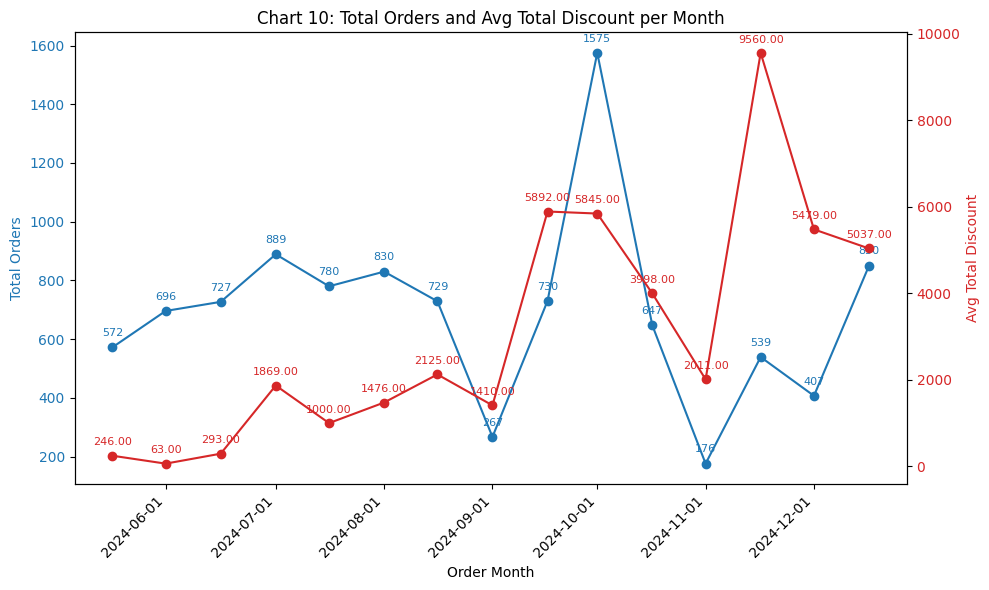

In [ ]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for total_orders_per_month_per_model_powertrain
color = "tab:blue"
ax1.set_xlabel("Order Month")
ax1.set_ylabel("Total Orders", color=color)
ax1.plot(
    eda_agg_discounts_df["order_month"],
    eda_agg_discounts_df["total_orders_per_month_per_model_powertrain"],
    color=color,
    marker="o",
    label="Total Orders",
)
# Add data labels for total orders
for x, y in zip(eda_agg_discounts_df["order_month"], eda_agg_discounts_df["total_orders_per_month_per_model_powertrain"]):
    ax1.text(x, y + 0.02 * max(eda_agg_discounts_df["total_orders_per_month_per_model_powertrain"]), str(y), color=color, fontsize=8, ha="center", va="bottom")
ax1.tick_params(axis="y", labelcolor=color)
ax1.set_xticklabels(eda_agg_discounts_df["order_month"], rotation=45, ha="right")

# Line plot for avg_total_discount_per_month
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Avg Total Discount", color=color)
ax2.plot(
    eda_agg_discounts_df["order_month"],
    eda_agg_discounts_df["avg_total_discount_per_month"],
    color=color,
    marker="o",
    label="Avg Total Discount",
)
# Add data labels for avg total discount
for x, y in zip(eda_agg_discounts_df["order_month"], eda_agg_discounts_df["avg_total_discount_per_month"]):
    ax2.text(x, y + 0.02 * max(eda_agg_discounts_df["avg_total_discount_per_month"]), f"{y:.2f}", color=color, fontsize=8, ha="center", va="bottom")
ax2.tick_params(axis="y", labelcolor=color)

# Title and layout
plt.title("Chart 10: Total Orders and Avg Total Discount per Month")
fig.tight_layout()
plt.show()

In [ ]:
import altair
chart_eda_agg_discounts_df = altair.Chart.from_json(r"""
{
    "width": "container",
    "height": "container",
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "layer": [
        {
            "description": "outer data layer",
            "resolve": {
                "scale": {
                    "color": "independent",
                    "y": "independent"
                }
            },
            "layer": [
                {
                    "description": "y-axis 0 layer",
                    "name": "seriesgroup_0",
                    "resolve": {
                        "scale": {
                            "color": "independent",
                            "y": "shared"
                        }
                    },
                    "layer": [
                        {
                            "description": "series data layer",
                            "name": "series_0198911e-ea8b-7ddf-a810-d9de53507ade",
                            "layer": [
                                {
                                    "description": "line series layer",
                                    "transform": [
                                        {
                                            "joinaggregate": [
                                                {
                                                    "field": "total_orders_per_month_per_model_powertrain",
                                                    "op": "sum",
                                                    "as": "sum_y_by_x"
                                                }
                                            ],
                                            "groupby": [
                                                "order_month"
                                            ]
                                        },
                                        {
                                            "calculate": "toDate(datum[\"order_month\"])",
                                            "as": "order_month"
                                        },
                                        {
                                            "filter": "isValid(datum[\"order_month\"])"
                                        }
                                    ],
                                    "layer": [
                                        {
                                            "description": "line mark layer",
                                            "mark": {
                                                "type": "line",
                                                "point": false,
                                                "clip": true,
                                                "strokeCap": "square",
                                                "strokeJoin": "round",
                                                "cursor": "crosshair"
                                            },
                                            "params": [
                                                {
                                                    "name": "interval_intervalselection_0",
                                                    "select": {
                                                        "type": "interval",
                                                        "encodings": [
                                                            "x"
                                                        ],
                                                        "zoom": false,
                                                        "mark": {
                                                            "fill": "#669EFF",
                                                            "fillOpacity": 0.07,
                                                            "stroke": "#669EFF",
                                                            "strokeOpacity": 0.4
                                                        }
                                                    }
                                                }
                                            ],
                                            "encoding": {
                                                "opacity": {
                                                    "value": 1
                                                }
                                            }
                                        },
                                        {
                                            "description": "pivot tooltip point mark layer",
                                            "mark": {
                                                "type": "point",
                                                "tooltip": false,
                                                "clip": true
                                            },
                                            "encoding": {
                                                "opacity": {
                                                    "value": 0,
                                                    "condition": {
                                                        "param": "shared_pivot_hover_param",
                                                        "value": 1,
                                                        "empty": false
                                                    }
                                                },
                                                "size": {
                                                    "value": 80
                                                }
                                            }
                                        },
                                        {
                                            "description": "data label text mark layer",
                                            "mark": {
                                                "type": "text",
                                                "dy": {
                                                    "expr": "0"
                                                },
                                                "dx": {
                                                    "expr": "0"
                                                },
                                                "clip": false
                                            },
                                            "transform": [],
                                            "encoding": {
                                                "text": {
                                                    "field": "total_orders_per_month_per_model_powertrain",
                                                    "aggregate": "sum",
                                                    "type": "quantitative",
                                                    "format": {
                                                        "format": "NUMBER",
                                                        "columnType": "NUMBER",
                                                        "numDecimalDigits": -1,
                                                        "currency": "USD",
                                                        "nanFormat": ""
                                                    },
                                                    "formatType": "NUMBER_FORMATTER"
                                                }
                                            }
                                        }
                                    ],
                                    "encoding": {
                                        "x": {
                                            "field": "order_month",
                                            "type": "temporal",
                                            "title": "order_month",
                                            "scale": {},
                                            "axis": {
                                                "grid": true,
                                                "ticks": true,
                                                "labels": true,
                                                "labelFlush": false,
                                                "format": {
                                                    "year": "%Y",
                                                    "quarter": "%b %d",
                                                    "month": "%b %d",
                                                    "week": "%b %d",
                                                    "day": "%b %d"
                                                }
                                            }
                                        },
                                        "y": {
                                            "field": "total_orders_per_month_per_model_powertrain",
                                            "type": "quantitative",
                                            "aggregate": "sum",
                                            "title": "Sum of total_orders_per_month_per_model_powertrain",
                                            "scale": {},
                                            "axis": {
                                                "grid": true,
                                                "ticks": true,
                                                "labels": true,
                                                "labelFlush": false,
                                                "format": {
                                                    "format": "NUMBER",
                                                    "columnType": "NUMBER",
                                                    "numDecimalDigits": -1,
                                                    "currency": "USD",
                                                    "nanFormat": ""
                                                },
                                                "formatType": "NUMBER_FORMATTER"
                                            }
                                        },
                                        "color": {
                                            "datum": "Sum of total_orders_per_month_per_model_powertrain",
                                            "scale": {
                                                "range": [
                                                    "#66C2A5"
                                                ]
                                            },
                                            "legend": {
                                                "symbolOpacity": 1,
                                                "symbolType": "stroke"
                                            }
                                        }
                                    }
                                }
                            ]
                        }
                    ]
                },
                {
                    "description": "y-axis 1 layer",
                    "name": "seriesgroup_1",
                    "resolve": {
                        "scale": {
                            "color": "independent",
                            "y": "shared"
                        }
                    },
                    "layer": [
                        {
                            "description": "series data layer",
                            "name": "series_0198911f-04bf-7ddf-a810-f206a506eb9f",
                            "layer": [
                                {
                                    "description": "line series layer",
                                    "transform": [
                                        {
                                            "joinaggregate": [
                                                {
                                                    "field": "avg_total_discount_per_month",
                                                    "op": "sum",
                                                    "as": "sum_y_by_x"
                                                }
                                            ],
                                            "groupby": [
                                                "order_month"
                                            ]
                                        },
                                        {
                                            "calculate": "toDate(datum[\"order_month\"])",
                                            "as": "order_month"
                                        },
                                        {
                                            "filter": "isValid(datum[\"order_month\"])"
                                        }
                                    ],
                                    "layer": [
                                        {
                                            "description": "line mark layer",
                                            "mark": {
                                                "type": "line",
                                                "point": false,
                                                "clip": true,
                                                "strokeCap": "square",
                                                "strokeJoin": "round",
                                                "cursor": "crosshair"
                                            },
                                            "encoding": {
                                                "opacity": {
                                                    "value": 1
                                                }
                                            }
                                        },
                                        {
                                            "description": "pivot tooltip point mark layer",
                                            "mark": {
                                                "type": "point",
                                                "tooltip": false,
                                                "clip": true
                                            },
                                            "encoding": {
                                                "opacity": {
                                                    "value": 0,
                                                    "condition": {
                                                        "param": "shared_pivot_hover_param",
                                                        "value": 1,
                                                        "empty": false
                                                    }
                                                },
                                                "size": {
                                                    "value": 80
                                                }
                                            }
                                        },
                                        {
                                            "description": "data label text mark layer",
                                            "mark": {
                                                "type": "text",
                                                "dy": {
                                                    "expr": "0"
                                                },
                                                "dx": {
                                                    "expr": "0"
                                                },
                                                "clip": false
                                            },
                                            "transform": [],
                                            "encoding": {
                                                "text": {
                                                    "field": "avg_total_discount_per_month",
                                                    "aggregate": "sum",
                                                    "type": "quantitative",
                                                    "format": {
                                                        "format": "NUMBER",
                                                        "columnType": "NUMBER",
                                                        "numDecimalDigits": -1,
                                                        "currency": "USD",
                                                        "nanFormat": ""
                                                    },
                                                    "formatType": "NUMBER_FORMATTER"
                                                }
                                            }
                                        }
                                    ],
                                    "encoding": {
                                        "x": {
                                            "field": "order_month",
                                            "type": "temporal",
                                            "title": "order_month",
                                            "scale": {},
                                            "axis": {
                                                "grid": true,
                                                "ticks": true,
                                                "labels": true,
                                                "labelFlush": false,
                                                "format": {
                                                    "year": "%Y",
                                                    "quarter": "%b %d",
                                                    "month": "%b %d",
                                                    "week": "%b %d",
                                                    "day": "%b %d"
                                                }
                                            }
                                        },
                                        "y": {
                                            "field": "avg_total_discount_per_month",
                                            "type": "quantitative",
                                            "aggregate": "sum",
                                            "title": "Sum of avg_total_discount_per_month",
                                            "scale": {},
                                            "axis": {
                                                "grid": false,
                                                "ticks": true,
                                                "labels": true,
                                                "labelFlush": false,
                                                "format": {
                                                    "format": "NUMBER",
                                                    "columnType": "NUMBER",
                                                    "numDecimalDigits": -1,
                                                    "currency": "USD",
                                                    "nanFormat": ""
                                                },
                                                "formatType": "NUMBER_FORMATTER"
                                            }
                                        },
                                        "color": {
                                            "datum": "Sum of avg_total_discount_per_month",
                                            "scale": {
                                                "range": [
                                                    "#FC8D62"
                                                ]
                                            },
                                            "legend": {
                                                "symbolOpacity": 1,
                                                "symbolType": "stroke"
                                            }
                                        }
                                    }
                                }
                            ]
                        }
                    ]
                },
                {
                    "description": "shared tooltip layer",
                    "encoding": {
                        "x": {
                            "field": "order_month",
                            "type": "temporal",
                            "title": "order_month",
                            "scale": {},
                            "axis": {
                                "grid": true,
                                "ticks": true,
                                "labels": true,
                                "labelFlush": false,
                                "format": {
                                    "year": "%Y",
                                    "quarter": "%b %d",
                                    "month": "%b %d",
                                    "week": "%b %d",
                                    "day": "%b %d"
                                }
                            }
                        }
                    },
                    "layer": [
                        {
                            "description": "shared tooltip rule mark layer",
                            "mark": {
                                "type": "rule",
                                "clip": true
                            },
                            "encoding": {
                                "opacity": {
                                    "condition": {
                                        "value": 0.3,
                                        "param": "shared_pivot_hover_param",
                                        "empty": false
                                    },
                                    "value": 0
                                },
                                "color": {
                                    "value": "CHART_DEFAULT_RULE_COLOR_MARKER"
                                },
                                "tooltip": [
                                    {
                                        "field": "order_month",
                                        "type": "temporal",
                                        "format": {
                                            "year": "%Y",
                                            "quarter": "%b %d",
                                            "month": "%b %d",
                                            "week": "%b %d",
                                            "day": "%b %d"
                                        },
                                        "title": "order_month"
                                    },
                                    {
                                        "field": "total_orders_per_month_per_model_powertrain",
                                        "type": "quantitative",
                                        "aggregate": "sum",
                                        "formatType": "NUMBER_FORMATTER",
                                        "format": {
                                            "format": "NUMBER",
                                            "columnType": "NUMBER",
                                            "numDecimalDigits": -1,
                                            "currency": "USD",
                                            "nanFormat": ""
                                        },
                                        "title": "Sum of total_orders_per_month_per_model_powertrain"
                                    },
                                    {
                                        "field": "avg_total_discount_per_month",
                                        "type": "quantitative",
                                        "aggregate": "sum",
                                        "formatType": "NUMBER_FORMATTER",
                                        "format": {
                                            "format": "NUMBER",
                                            "columnType": "NUMBER",
                                            "numDecimalDigits": -1,
                                            "currency": "USD",
                                            "nanFormat": ""
                                        },
                                        "title": "Sum of avg_total_discount_per_month"
                                    }
                                ]
                            },
                            "params": [
                                {
                                    "name": "shared_pivot_hover_param",
                                    "select": {
                                        "type": "point",
                                        "fields": [
                                            "order_month"
                                        ],
                                        "nearest": true,
                                        "on": "mouseover",
                                        "clear": "mouseout"
                                    }
                                }
                            ]
                        }
                    ]
                }
            ],
            "transform": []
        }
    ],
    "config": {
        "legend": {
            "orient": "right"
        },
        "font": "\"IBM Plex Sans\", system-ui, -apple-system, BlinkMacSystemFont, sans-serif",
        "view": {}
    },
    "datasets": {
        "layer00": [
            {
                "name": "dummy",
                "value": 0
            }
        ]
    },
    "usermeta": {
        "selectionConfigs": {
            "interval_intervalselection_0": {
                "type": "interval",
                "datetimeFields": [
                    "order_month"
                ],
                "derived": []
            }
        },
        "columnNameMappings": {
            "CHART_FOLD_KEYS": "Y-Axis Field",
            "CHART_FOLD_VALUES": "Values"
        }
    }
}
""")
chart_eda_agg_discounts_df.datasets.layer00 = eda_agg_discounts_df.to_json(orient='records')
chart_eda_agg_discounts_df.display(actions=False)

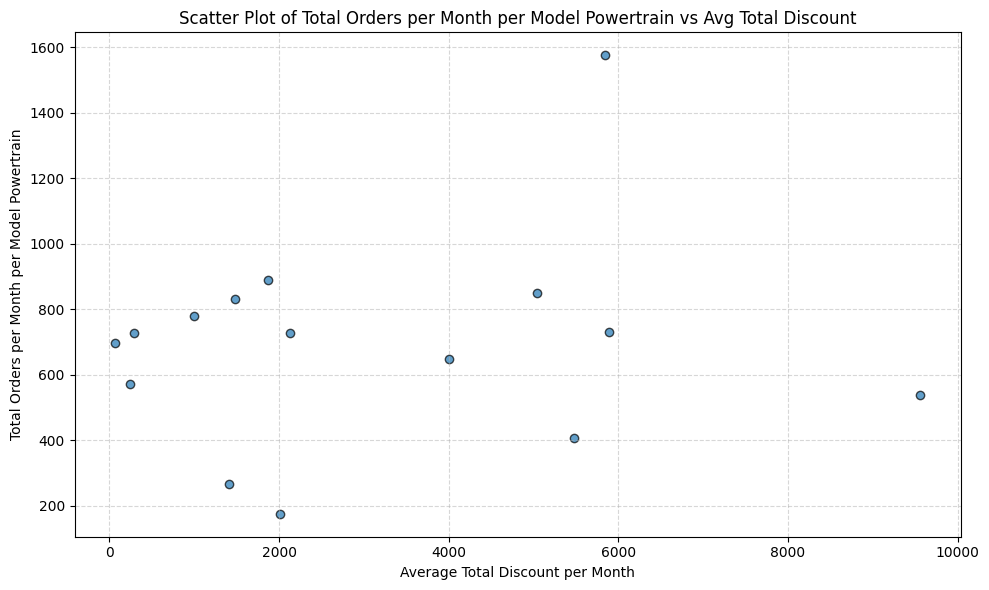

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot: avg_total_discount_per_month vs total_orders_per_month_per_model_powertrain
ax.scatter(
    eda_agg_discounts_df["avg_total_discount_per_month"],
    eda_agg_discounts_df["total_orders_per_month_per_model_powertrain"],
    alpha=0.7,
    color="tab:blue",
    edgecolor="k",
)

ax.set_xlabel("Average Total Discount per Month")
ax.set_ylabel("Total Orders per Month per Model Powertrain")
ax.set_title(
    "Scatter Plot of Total Orders per Month per Model Powertrain vs Avg Total Discount"
)
ax.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
import altair
chart_eda_agg_discounts_df = altair.Chart.from_json(r"""
{
    "width": "container",
    "height": "container",
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "layer": [
        {
            "description": "outer data layer",
            "resolve": {
                "scale": {
                    "color": "independent",
                    "y": "shared"
                }
            },
            "layer": [
                {
                    "description": "series data layer",
                    "name": "series_01989127-c90f-7ddf-a822-2362f7ed0a61",
                    "layer": [
                        {
                            "description": "scatter series layer",
                            "transform": [
                                {
                                    "joinaggregate": [
                                        {
                                            "field": "total_orders_per_month_per_model_powertrain",
                                            "op": "sum",
                                            "as": "sum_y_by_x"
                                        }
                                    ],
                                    "groupby": [
                                        "avg_total_discount_per_month"
                                    ]
                                },
                                {
                                    "filter": "isValid(datum[\"avg_total_discount_per_month\"])"
                                }
                            ],
                            "layer": [
                                {
                                    "layer": [
                                        {
                                            "description": "scatter point mark layer",
                                            "mark": {
                                                "type": "point",
                                                "filled": true,
                                                "clip": true,
                                                "cursor": "crosshair"
                                            },
                                            "params": [
                                                {
                                                    "name": "interval_intervalselection_0",
                                                    "select": {
                                                        "type": "interval",
                                                        "encodings": [
                                                            "x"
                                                        ],
                                                        "zoom": false,
                                                        "mark": {
                                                            "fill": "#669EFF",
                                                            "fillOpacity": 0.07,
                                                            "stroke": "#669EFF",
                                                            "strokeOpacity": 0.4
                                                        }
                                                    }
                                                }
                                            ],
                                            "encoding": {}
                                        },
                                        {
                                            "description": "data label text mark layer",
                                            "mark": {
                                                "type": "text",
                                                "dy": {
                                                    "expr": "0"
                                                },
                                                "dx": {
                                                    "expr": "0"
                                                },
                                                "clip": false
                                            },
                                            "transform": [],
                                            "encoding": {
                                                "text": {
                                                    "field": "total_orders_per_month_per_model_powertrain",
                                                    "aggregate": "sum",
                                                    "type": "quantitative",
                                                    "format": {
                                                        "format": "NUMBER",
                                                        "columnType": "NUMBER",
                                                        "numDecimalDigits": -1,
                                                        "currency": "USD",
                                                        "nanFormat": ""
                                                    },
                                                    "formatType": "NUMBER_FORMATTER"
                                                }
                                            }
                                        }
                                    ],
                                    "encoding": {
                                        "color": {
                                            "value": "#FC8D62"
                                        },
                                        "opacity": {
                                            "condition": {
                                                "test": {
                                                    "not": {
                                                        "and": [
                                                            {
                                                                "param": "interval_intervalselection_0"
                                                            }
                                                        ]
                                                    }
                                                },
                                                "value": 0.3
                                            },
                                            "value": 1
                                        }
                                    }
                                },
                                {
                                    "description": "scatter tooltip point mark layer",
                                    "mark": {
                                        "type": "point",
                                        "filled": true,
                                        "clip": true,
                                        "cursor": "crosshair"
                                    },
                                    "encoding": {
                                        "color": {
                                            "value": "#FC8D62"
                                        },
                                        "tooltip": [
                                            {
                                                "field": "avg_total_discount_per_month",
                                                "type": "quantitative",
                                                "formatType": "NUMBER_FORMATTER",
                                                "format": {
                                                    "format": "NUMBER",
                                                    "columnType": "NUMBER",
                                                    "numDecimalDigits": -1,
                                                    "currency": "USD",
                                                    "nanFormat": ""
                                                },
                                                "title": "avg_total_discount_per_month"
                                            },
                                            {
                                                "field": "total_orders_per_month_per_model_powertrain",
                                                "type": "quantitative",
                                                "aggregate": "sum",
                                                "formatType": "NUMBER_FORMATTER",
                                                "format": {
                                                    "format": "NUMBER",
                                                    "columnType": "NUMBER",
                                                    "numDecimalDigits": -1,
                                                    "currency": "USD",
                                                    "nanFormat": ""
                                                },
                                                "title": "Sum of total_orders_per_month_per_model_powertrain"
                                            }
                                        ],
                                        "opacity": {
                                            "value": 0,
                                            "condition": {
                                                "param": "point_hover_01989127-c90f-7ddf-a822-2362f7ed0a61",
                                                "value": 1,
                                                "empty": false
                                            }
                                        },
                                        "size": {
                                            "value": 100
                                        }
                                    },
                                    "params": [
                                        {
                                            "name": "point_hover_01989127-c90f-7ddf-a822-2362f7ed0a61",
                                            "select": {
                                                "type": "point",
                                                "on": "mouseover",
                                                "nearest": false
                                            }
                                        }
                                    ]
                                }
                            ],
                            "encoding": {
                                "x": {
                                    "field": "avg_total_discount_per_month",
                                    "type": "quantitative",
                                    "title": "avg_total_discount_per_month",
                                    "scale": {
                                        "padding": 8
                                    },
                                    "axis": {
                                        "grid": true,
                                        "ticks": true,
                                        "labels": true,
                                        "labelFlush": false,
                                        "format": {
                                            "format": "NUMBER",
                                            "columnType": "NUMBER",
                                            "numDecimalDigits": -1,
                                            "currency": "USD",
                                            "nanFormat": ""
                                        },
                                        "formatType": "NUMBER_FORMATTER"
                                    }
                                },
                                "y": {
                                    "field": "total_orders_per_month_per_model_powertrain",
                                    "type": "quantitative",
                                    "aggregate": "sum",
                                    "title": "Sum of total_orders_per_month_per_model_powertrain",
                                    "scale": {},
                                    "axis": {
                                        "grid": true,
                                        "ticks": true,
                                        "labels": true,
                                        "labelFlush": false,
                                        "format": {
                                            "format": "NUMBER",
                                            "columnType": "NUMBER",
                                            "numDecimalDigits": -1,
                                            "currency": "USD",
                                            "nanFormat": ""
                                        },
                                        "formatType": "NUMBER_FORMATTER"
                                    }
                                }
                            }
                        }
                    ]
                }
            ],
            "transform": []
        }
    ],
    "config": {
        "legend": {
            "orient": "right"
        },
        "font": "\"IBM Plex Sans\", system-ui, -apple-system, BlinkMacSystemFont, sans-serif",
        "view": {}
    },
    "datasets": {
        "layer00": [
            {
                "name": "dummy",
                "value": 0
            }
        ]
    },
    "usermeta": {
        "selectionConfigs": {
            "interval_intervalselection_0": {
                "type": "interval",
                "datetimeFields": [],
                "derived": []
            }
        },
        "columnNameMappings": {
            "CHART_FOLD_KEYS": "Y-Axis Field",
            "CHART_FOLD_VALUES": "Values"
        }
    }
}
""")
chart_eda_agg_discounts_df.datasets.layer00 = eda_agg_discounts_df.to_json(orient='records')
chart_eda_agg_discounts_df.display(actions=False)

Judging by above, we can see a general alignment between the change in average discounts per month and the total orders per month
One interesting discrepancy is there was a spike in orders in March 2025, with a decrease in in average discounts
Would be interesting to actually calculate the strength of the relationship



Hypothesis: 
- Question: Do higher average discounts lead to more total orders?
- Null Hypothesis: There is no statistically significant relationship between the average monthly discount and the total number of monthly orders
- Alternate Hypothesis: There is a statistically significant relationship between average monthly discount and total number of monthly orders



If we chart the relationship between discount and total orders, we may not see as strong of a relationship. Although the direction is generally a positive relationship, but there is a but drop off around $3500-4000 in discounts


To quantify the relationship, we can do a correlation analysis measuring the Pearson correlation coefficient (r); we will also calculate the p-value of the correlation to see if it is statistically significant or if it happened by chance 


After identifying correlation, we can try a linear regression model, but we also want to consider other factors such as:
What else can influence orders (ie. seasonality, marketing spend, IRA incentives news, etc)
Lag effects (does a discount offered in May affect June's sales?); are there lag effects to marketing spend as well
Also how do I make this an end-to-end solution
ie) Sales gives a discount budget per model_powertrain, same with marketing




In [ ]:
import pandas as pd
from scipy.stats import pearsonr

def calculate_correlation_and_statistical_significance(df:pd.DataFrame):
    #Isolate columns
    discounts = df['avg_total_discount_per_month']
    orders = df['total_orders_per_month_per_model_powertrain']

    #Calculate Pearson correlation
    r_value, p_value = pearsonr(discounts, orders)

    print(f"Correlation Coefficient (r): {r_value:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < 0.05:
        print("The p-value is less than 0.05 which means the correlation is statistically significant; you can confidently reject null hypothesis")
    else:
        print("The p-value is great than or equal to 0.05 which means the correlation is not statistically significant; you cannot reject null hypothesis")

calculate_correlation_and_statistical_significance(eda_agg_discounts_df)

Correlation Coefficient (r): 0.1580
P-value: 0.5738
The p-value is great than or equal to 0.05 which means the correlation is not statistically significant; you cannot reject null hypothesis


The correlation is positive but would also be cautious as it is not strong but more of a moderately strong relationship.


The p-value tells us that there is only a 3.3% chance that the relationship we found is a fluke. Since the chance is so low that this is a coincidence, we can link discounts and orders as significant. 



As an initial test run, let's try building a linear regression model off of one feature (we're saying in this hypothetical universe only discounts affect orders, which we know is not true in practice).

In [ ]:
import pandas as pd
import statsmodels.api as sm

def linear_regression_model(df:pd.DataFrame):
    y = df['total_orders_per_month_per_model_powertrain']
    x = df['avg_total_discount_per_month']

    #add a constant for the model's intercept term
    x = sm.add_constant(x)
    #what does this function do -> sm.add_constant() is a function that adds a column of ones to the dataset; 
    #this new column is used to calculate the model's intercept
    #Unlike some other libraries that add this intercept term automatically, the statsmodels library requires you to add it explicitly. If you forget to use sm.add_constant(), you are telling the model to calculate a line that goes through the origin (0,0), forcing the intercept to be zero. This is usually not what you want and results in a less accurate model.


    #how does it calculate the intercept?

    model = sm.OLS(y, x).fit()

    print(model.summary())

linear_regression_model(eda_agg_discounts_df)

                                         OLS Regression Results                                        
Dep. Variable:     total_orders_per_month_per_model_powertrain   R-squared:                       0.025
Model:                                                     OLS   Adj. R-squared:                 -0.050
Method:                                          Least Squares   F-statistic:                    0.3329
Date:                                         Fri, 22 Aug 2025   Prob (F-statistic):              0.574
Time:                                                 21:16:56   Log-Likelihood:                -107.15
No. Observations:                                           15   AIC:                             218.3
Df Residuals:                                               13   BIC:                             219.7
Df Model:                                                    1                                         
Covariance Type:                                     nonrobust  

The main takeaway from this summary is the R-squared v alue and the Ajusted R-squared value. 

- R-squared, or the coefficient of determination, tells us the model's power at explaining the output. So in this case this model is able to explain 35.7% of the change in monthly orders using the average discount
- However, the Adjusted R-squared tells a different story. By the nature of how R-squared is calculated, adding more datapoints in this model will always increase R-squared, even if the new datapoint has no relationship with the outcome. However, Adjusted R-squared takes this into account and is in short a better measure for understanding our model's ability to predict. 

In short, our model is only able to calculate 30% of the outcome with average discounts. We know that there are other drivers to sales, and will next begin to incorporate marketing spend metrics.

Interpreting the Results
- R-Squared (coefficient of determination) tells us our model's explanatory power; 30.3% of the change in monthly orders can be explained by average discount; while this is meaninful there are other variables which explain the other 70%
- Adjusted R-Squared is a modified version of R-squared that has been adjusted for the number of predictors in a regression model; it's used to compare the performance of models that have different number of independent variables; The reason why we would consider using it is because a regular R-Squared will always increase with every new indepeendent value even if there is no relationship with the outcome. This can be misleading and lead to an inaccurate model (overfitting). 
- How Adjusted R-Squared helps is it penalizes the score for each additional variable you add. If you add a useful variable, Adjusted R-Squared increases, if you add a useless variable it will decrease
- In this case, my R Squared is 30% while Adjusted R-Squared is 25%, what do I do now? Adjusted R-Squared accounts for statistical noise which gives us a better estimate of how well our model performs on new data; a large gap between the two is a red flag but in our case this shouldn't be a major concern, we also only have limited observations of 15 months

- F-statistic is a value you get when running a regression analysis to test overall significant of your model; "are the independent variable in my model, as a group, providing a better fit to the data than a simple model with no variables at all?" A high F-statistic means that the variation explained by your model is much larger than the variation it couldn't explain, and this indicates your model has real predictive power and its results aren't likely due to random chance
- Prob (F-statistic) is 0.033 which is the same as your p-value; the model is statistically significant

- Log-Likelihood: Its primary use is for **comparing different models fit to the same data**. The model with the higher log-likelihood is considered the better fit. Log-likelihood is also a key ingredient in more advanced comparison metrics like **AIC** and **BIC**, which you can also see in your regression summary.

- AIC and BIC: When you build a statistical model, you can often improve its fit by adding more variables. However, adding too many variables can lead to **overfitting**, where the model starts to memorize the noise in your data rather than capturing the true underlying trend. An overfit model looks great on the data it was built on but performs poorly on new, unseen data.

`total_orders = 2139.60 + 0.1498 * avg_total_discount_per_month
` - Every 1 dollar increase in avg_total discount is a 0.15 increase in orders

- The model is saying without any discounts that month, we can expect a base average of 2139 orders a month -> this may not make sense or may be flawed since most of our data is influenced by discounts... how to separate the two  im not sure

Standard Error: 
,**What it is:**, A measure of the ,**uncertainty**, or "wobble" around your coefficient estimate. Your model calculated a slope of ,**0.1498**, from your specific 15 months of data. The standard error (,**0.063**,) quantifies how much you would expect that slope to vary if you were to re-run the analysis on a different 15-month sample.

,`t`, (t-statistic)


Tests for Normality of Residuals



A key assumption of OLS regression is that the errors (residuals) are normally distributed (form a bell curve). These tests check that assumption.

- **Omnibus / Prob(Omnibus) (**,`**4.997**`,** / **,`**0.082**`,**):**, This is a combined test for the skewness and kurtosis of the residuals. The important number is the ,`Prob(Omnibus)`,, which is a p-value. Your value of ,**0.082**, is greater than 0.05, which is good. It means we don't have evidence to suggest the residuals are not normally distributed.
- **Jarque-Bera (JB) / Prob(JB) (**,`**2.239**`,** / **,`**0.326**`,**):**, This is another test for normality. Your ,`Prob(JB)`, of ,**0.326**, is also well above 0.05, strongly supporting that your residuals are normal. This is a positive sign. ✅
- **Skew (**,`**-0.593**`,**):**, This measures the symmetry of your residual distribution. A value of 0 represents perfect symmetry. Your value of ,**-0.593**, indicates a slight skew, but values between -1 and 1 are generally not a cause for concern.
- **Kurtosis (**,`**4.474**`,**):**, This measures the "peakiness" and "tailedness" of the distribution compared to a normal one. Your value is a bit high, suggesting slightly heavier tails than a perfect normal distribution, but combined with the Omnibus and JB tests, it's likely not a major issue.

---



### Test for Autocorrelation

- **Durbin-Watson (**,`**1.293**`,**):**, This tests if the errors are correlated with each other over time (a concept called ,**autocorrelation**,). This is especially important for time-series data like yours. The statistic ranges from 0 to 4.
  - A value around ,**2.0**, is ideal, indicating no autocorrelation.
  - A value toward 0 indicates positive autocorrelation.
  - Your value of ,**1.293**, is leaning towards the positive side. It's a mild warning that there might be some time-based pattern in the errors that your model isn't capturing (perhaps due to seasonality).

---



### Test for Multicollinearity



**Cond. No. (Condition Number) (**`**7.59e+03**`**):** This tests for high correlation between your independent variables. A high number (generally > 30) is a red flag. While your number is high, this test is primarily for **multiple regression** (models with more than one independent variable). In a simple regression like yours, it's not a concern.




--- Generating Regression Plot ---


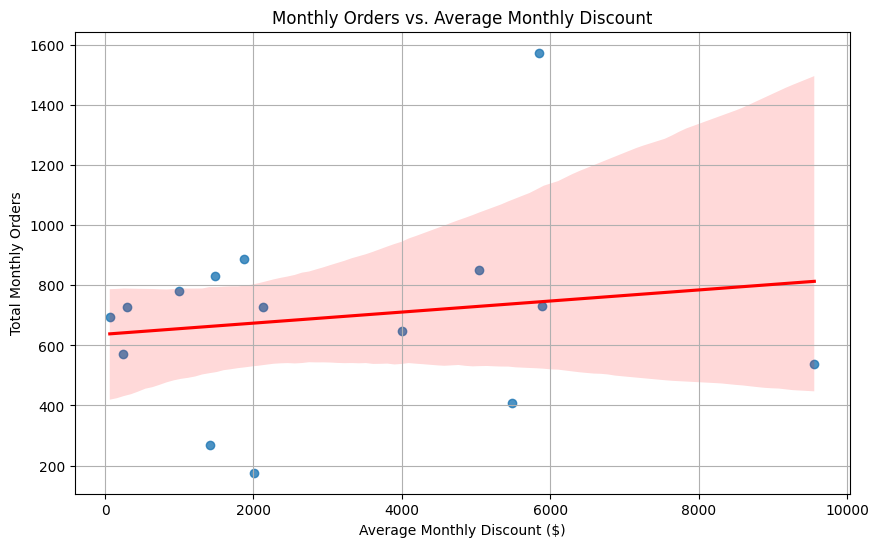

In [ ]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_and_visualize_regression(df:pd.DataFrame):
    # --- Part 1: Build the Model (your existing code) ---
    y = df['total_orders_per_month_per_model_powertrain']
    x_data = df['avg_total_discount_per_month']



    # --- Part 2: Visualize the Relationship ---
    print("--- Generating Regression Plot ---")
    plt.figure(figsize=(10, 6)) # Set the figure size
    
    # Use seaborn's regplot to create the scatter plot and regression line
    sns.regplot(x=x_data, y=y, ci=95, line_kws={"color": "red"})
    
    plt.title('Monthly Orders vs. Average Monthly Discount')
    plt.xlabel('Average Monthly Discount ($)')
    plt.ylabel('Total Monthly Orders')
    plt.grid(True)
    plt.show()

analyze_and_visualize_regression(eda_agg_discounts_df)

In [ ]:
# import jinja2
# raw_query = """
#     SELECT *
#     FROM commercial.marketing.agg_daily_marketing_kpis
#     ORDER BY date_pt ASC
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
import pandas as pd
import numpy as np

def create_fake_marketing_kpi_dataset(num_days=450):
    """
    Generates a detailed, daily-level fake marketing KPI dataset.

    Args:
        num_days (int): The number of days of data to generate.

    Returns:
        pd.DataFrame: A DataFrame containing the fake marketing data.
    """
    # --- 1. Define all column names ---
    columns = [
        'date_pt', 'opens_email', 'clicks_email', 'impressions_pm_upper_funnel',
        'impressions_pm_mid_funnel', 'impressions_pm_lower_funnel', 'clicks_pm_upper_funnel',
        'clicks_pm_mid_funnel', 'clicks_pm_lower_funnel', 'spend_upper_funnel',
        'spend_mid_funnel', 'spend_lower_funnel', 'impressions_paid_search',
        'impressions_paid_video', 'impressions_paid_display', 'impressions_paid_social',
        'impressions_paid_performance_max', 'clicks_paid_search', 'clicks_paid_video',
        'clicks_paid_display', 'clicks_paid_social', 'clicks_paid_performance_max',
        'spend_paid_search', 'spend_paid_video', 'spend_paid_display',
        'spend_paid_social', 'spend_paid_performance_max', 'unique_visitors_total',
        'unique_visitors_website', 'unique_visitors_paid_media', 'unique_visitors_paid_search',
        'unique_visitors_paid_social', 'unique_visitors_paid_video', 'unique_visitors_paid_display',
        'unique_visitors_paid_performance_max', 'unique_visitors_paid_partnership',
        'unique_visitors_paid_affiliates', 'unique_visitors_organic_social',
        'unique_visitors_event_marketing', 'unique_visitors_local_marketing',
        'web_traffic_total', 'web_traffic_website', 'web_traffic_paid_media',
        'web_traffic_paid_search', 'web_traffic_paid_social', 'web_traffic_paid_video',
        'web_traffic_paid_display', 'web_traffic_paid_performance_max',
        'web_traffic_paid_partnership', 'web_traffic_paid_affiliates',
        'web_traffic_organic_social', 'web_traffic_event_marketing',
        'web_traffic_local_marketing', 'foot_traffic', 'impressions_organic_social',
        'engagement_organic_social', 'earned_reach', 'partner_impressions',
        'leads_total', 'leads_paid_media', 'leads_paid_social', 'leads_paid_search',
        'leads_paid_video', 'leads_paid_display', 'leads_paid_performance_max',
        'leads_paid_affiliates', 'leads_paid_partnership', 'leads_local_marketing',
        'leads_ambassadors', 'leads_website', 'leads_event_marketing',
        'leads_organic_social', 'drives_total', 'drives_paid_media',
        'drives_paid_video', 'drives_paid_social', 'drives_paid_display',
        'drives_paid_search', 'drives_paid_performance_max', 'drives_paid_affiliates',
        'drives_event_marketing', 'drives_marketing_email', 'drives_organic_social',
        'drives_paid_partnership', 'drives_website', 'orders_total',
        'orders_event_marketing', 'orders_marketing_email', 'orders_organic_social',
        'orders_paid_partnership', 'orders_website', 'orders_paid_media',
        'orders_paid_search', 'orders_paid_social', 'orders_paid_display',
        'orders_paid_performance_max', 'orders_paid_affiliates', 'orders_paid_video',
        'orders_r2_total', 'orders_rpo_total', 'orders_r2_paid_media',
        'orders_rpo_paid_media'
    ]

    # --- 2. Create a date range ---
    dates = pd.date_range(end=pd.Timestamp.now(), periods=num_days, freq='D')
    data = {'date_pt': dates}

    # --- 3. Generate data with logical relationships ---
    
    # Base metrics (spend drives impressions, which drive clicks, etc.)
    data['spend_paid_search'] = np.random.randint(500, 2000, size=num_days)
    data['impressions_paid_search'] = data['spend_paid_search'] * np.random.randint(20, 50)
    data['clicks_paid_search'] = (data['impressions_paid_search'] * np.random.uniform(0.01, 0.05)).astype(int)
    
    data['spend_paid_social'] = np.random.randint(400, 1800, size=num_days)
    data['impressions_paid_social'] = data['spend_paid_social'] * np.random.randint(30, 60)
    data['clicks_paid_social'] = (data['impressions_paid_social'] * np.random.uniform(0.005, 0.03)).astype(int)

    # Simplified generation for other channels
    for channel in ['video', 'display', 'performance_max', 'affiliates', 'partnership']:
        data[f'spend_paid_{channel}'] = np.random.randint(200, 1000, size=num_days)
        data[f'impressions_paid_{channel}'] = data[f'spend_paid_{channel}'] * np.random.randint(10, 40)
        data[f'clicks_paid_{channel}'] = (data[f'impressions_paid_{channel}'] * np.random.uniform(0.005, 0.02)).astype(int)

    # Email metrics
    data['opens_email'] = np.random.randint(5000, 15000, size=num_days)
    data['clicks_email'] = (data['opens_email'] * np.random.uniform(0.02, 0.08)).astype(int)
    
    # Organic & Other
    data['impressions_organic_social'] = np.random.randint(1000, 5000, size=num_days)
    data['engagement_organic_social'] = (data['impressions_organic_social'] * np.random.uniform(0.03, 0.10)).astype(int)
    data['foot_traffic'] = np.random.randint(50, 300, size=num_days)

    # Generate other base columns with simple random data
    for col in columns:
        if col not in data:
            if 'spend' in col:
                data[col] = np.random.randint(100, 500, size=num_days)
            elif 'impression' in col:
                 data[col] = np.random.randint(10000, 50000, size=num_days)
            elif 'click' in col:
                 data[col] = np.random.randint(100, 500, size=num_days)
            elif 'visitor' in col or 'traffic' in col:
                 data[col] = np.random.randint(200, 1000, size=num_days)
            elif 'lead' in col or 'drive' in col or 'order' in col:
                 data[col] = np.random.randint(5, 50, size=num_days)
            else:
                 data[col] = np.random.randint(0, 100, size=num_days)


    # --- 4. Calculate 'total' columns to ensure consistency ---
    df = pd.DataFrame(data) # Create temporary df to make summing easier
    
    # Helper function to find and sum columns
    def sum_by_keyword(df, keyword):
        cols_to_sum = [col for col in df.columns if keyword in col and f'{keyword}_total' not in col]
        return df[cols_to_sum].sum(axis=1)

    df['orders_total'] = sum_by_keyword(df, 'orders_')
    df['leads_total'] = sum_by_keyword(df, 'leads_')
    df['drives_total'] = sum_by_keyword(df, 'drives_')
    df['web_traffic_total'] = sum_by_keyword(df, 'web_traffic_')
    df['unique_visitors_total'] = sum_by_keyword(df, 'unique_visitors_')

    # Ensure final DataFrame has all columns in the correct order
    final_df = pd.DataFrame(df, columns=columns)

    return final_df

# --- Generate and display the dataset ---
fake_marketing_df = create_fake_marketing_kpi_dataset()



The marketing dataset is ordered in a way such that metrics show as metric_source. Sorting the dataframe by the column names will help us group together the metrics visually. 

In [ ]:
import pandas as pd

# Assume 'eda_marketing_df' is your existing DataFrame.

# Get the list of columns and sort them alphabetically
sorted_columns = sorted(eda_marketing_df.columns)

# Re-index the DataFrame with the sorted list of columns
eda_marketing_df = eda_marketing_df[sorted_columns]



In [ ]:
eda_marketing_df

Because there are so many variables, we will aggregate them on a higher level

In [ ]:
import pandas as pd

# Assume 'marketing_df' is your DataFrame loaded from your data source
# marketing_df = pd.read_csv('your_marketing_kpis.csv')

eda_marketing_df['date_pt'] = pd.to_datetime(eda_marketing_df['date_pt'])
eda_marketing_df['month'] = eda_marketing_df['date_pt'].dt.to_period('M').dt.to_timestamp()


spend_cols = [col for col in eda_marketing_df.columns if 'spend' in col]
clicks_cols = [col for col in eda_marketing_df.columns if 'click' in col]
impressions_cols = [col for col in eda_marketing_df.columns if 'impression' in col]

drives_cols = [col for col in eda_marketing_df.columns if 'drives' in col]
leads_cols =  [col for col in eda_marketing_df.columns if 'leads' in col]



eda_marketing_df['total_spend'] = eda_marketing_df[spend_cols].sum(axis=1)
eda_marketing_df['total_clicks'] = eda_marketing_df[clicks_cols].sum(axis=1)
eda_marketing_df['total_impressions'] = eda_marketing_df[impressions_cols].sum(axis=1)

eda_marketing_df['total_drives'] = eda_marketing_df[drives_cols].sum(axis=1)
eda_marketing_df['total_leads'] = eda_marketing_df[leads_cols].sum(axis=1)

#there are already columns for total_clicks, total_impressions, total_spend

monthly_marketing_df = eda_marketing_df.groupby('month').agg(
    total_spend=('total_spend', 'sum'),
    total_clicks=('total_clicks', 'sum'),
    total_impressions=('total_impressions', 'sum'),
    total_drives=('total_drives', 'sum'), 
    total_leads=('total_leads', 'sum'),
    email_opens=('opens_email', 'sum'),
    foot_traffic=('foot_traffic', 'sum'),
    web_traffic =('web_traffic_total', 'sum'),
    order_total = ('orders_total', 'sum')
).reset_index()


In [ ]:
monthly_marketing_df

Questions I have
- Is foot_traffic how many people came into the store
- Total drives -> I summed up everything with drives in the column name, what does this actually tell me? the number of drives per month? I act still don't get how you can have a partial drive but need to read the MTA slides
- web_traffic are how many people visit the website
- what is a lead and how is it defined?
- same for impressions...
- how are all the columns distinct?




Now that we have our marketing data aggregated and cleaned, we need to figure out if there is multicollinearity -> do any of the variables in here highly correlate with each other -> if so we don't want to keep both because it's a redundant variable

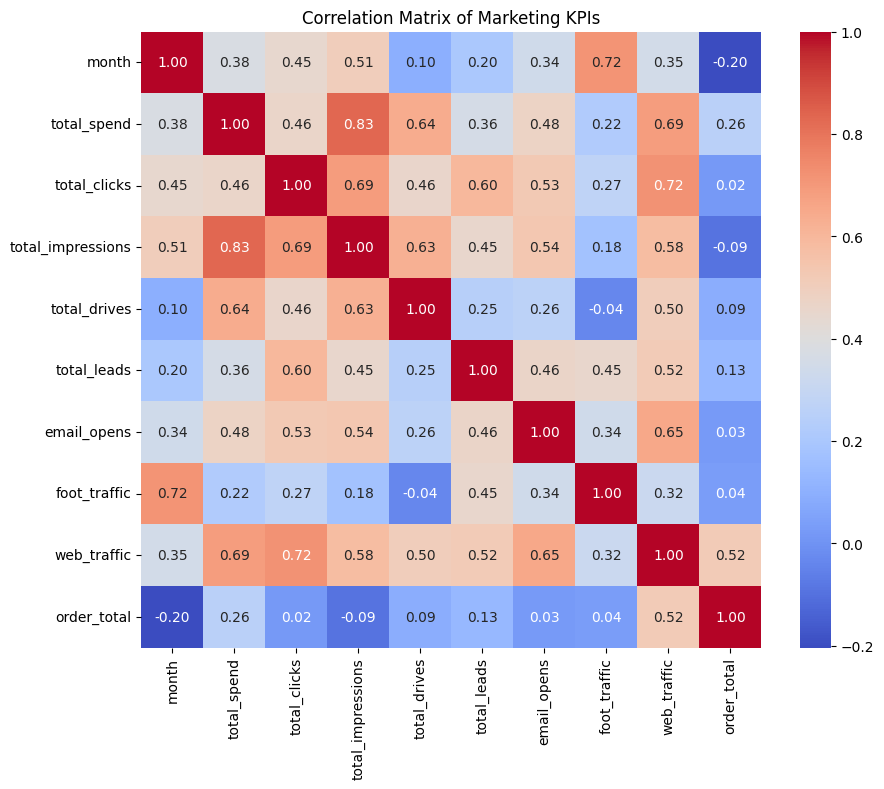

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'monthly_marketing_df' is the DataFrame you just created.

# Calculate the correlation matrix
# The .corr() method automatically ignores non-numeric columns like 'month'
correlation_matrix = monthly_marketing_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, 
            annot=True,        # Show the correlation values on the heatmap
            cmap='coolwarm',   # Use a nice color map
            fmt=".2f")         # Format the numbers to two decimal places

plt.title('Correlation Matrix of Marketing KPIs')
plt.show()

Using a general threshold of 0.7, we see a lot of relationships that are multicollinear
- total_spend and total_impressions -> total_spend keep
- total_spend and web_traffic -> total_spend keep
- total_clicks and web_traffic -> total_clicks keep
- total_clicks and total_impressions -> total_clicks keep
So we don't want to keep duplicates

In [ ]:
monthly_marketing_df_2 = monthly_marketing_df[['month','order_total','total_spend', 'total_clicks', 'total_drives', 'total_leads', 'email_opens', 'foot_traffic']]


monthly_marketing_df_2['month'] = pd.to_datetime(monthly_marketing_df_2['month'])

# Step 2: Convert the datetime to just the date part
monthly_marketing_df_2['month'] = monthly_marketing_df_2['month'].dt.date


hex_cell_0198917d-3f88-7ddf-a85e-a9e0962b72ce.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_marketing_df_2['month'] = pd.to_datetime(monthly_marketing_df_2['month'])
hex_cell_0198917d-3f88-7ddf-a85e-a9e0962b72ce.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_marketing_df_2['month'] = monthly_marketing_df_2['month'].dt.date


In [ ]:
eda_agg_discounts_df

In [ ]:
monthly_marketing_df_2

I see different order_total between the discounts df and the marketing df... will use discounts df orders for now



In [ ]:
merged_df = eda_agg_discounts_df.merge(monthly_marketing_df_2, how='left', left_on='order_month', right_on='month')
merged_df_copy = merged_df.copy()
merged_df_copy = merged_df_copy[['order_month',
'total_orders_per_month_per_model_powertrain',
'avg_total_discount_per_month',
'total_spend',
'total_clicks',
'total_drives',
'total_leads',
'email_opens',
'foot_traffic',]]

lag_period = 3
marketing_cols_to_lag = [
    'total_spend',
    'total_clicks',
    'total_drives',
    'total_leads',
    'email_opens',
    'foot_traffic',
]
for col in marketing_cols_to_lag:
    # Create a new column name for the lagged feature
    new_col_name = f'{col}_lag_{lag_period}'
    # Use .shift() to move the data down by the lag period
    merged_df_copy[new_col_name] = merged_df_copy[col].shift(lag_period)

# --- 3. Handle missing values ---
# The first few rows will have NaN values because there is no past data.
# These must be removed before using the data in a model.
merged_df_with_lags = merged_df_copy.dropna().reset_index(drop=True)


#with limited data this could be very flawed honestly
#also maybe the lag data needs to come further upstream at the data ingestion

In [ ]:
merged_df_with_lags

In [ ]:
# import jinja2
# raw_query = """
#     select ds.*, 
#     ms.total_spend,
#     ms.total_clicks, 
#     ms.total_drives,
#     ms.total_leads,
#     ms.email_opens,
#     ms.foot_traffic
#     from eda_agg_discounts_df ds
#     left join monthly_marketing_df_2 ms on ds.order_month = ms.month
# """
# sql_query = jinja2.Template(raw_query).render(vars())

Let's observe if there is any multi-collinearity in this new aggregated table

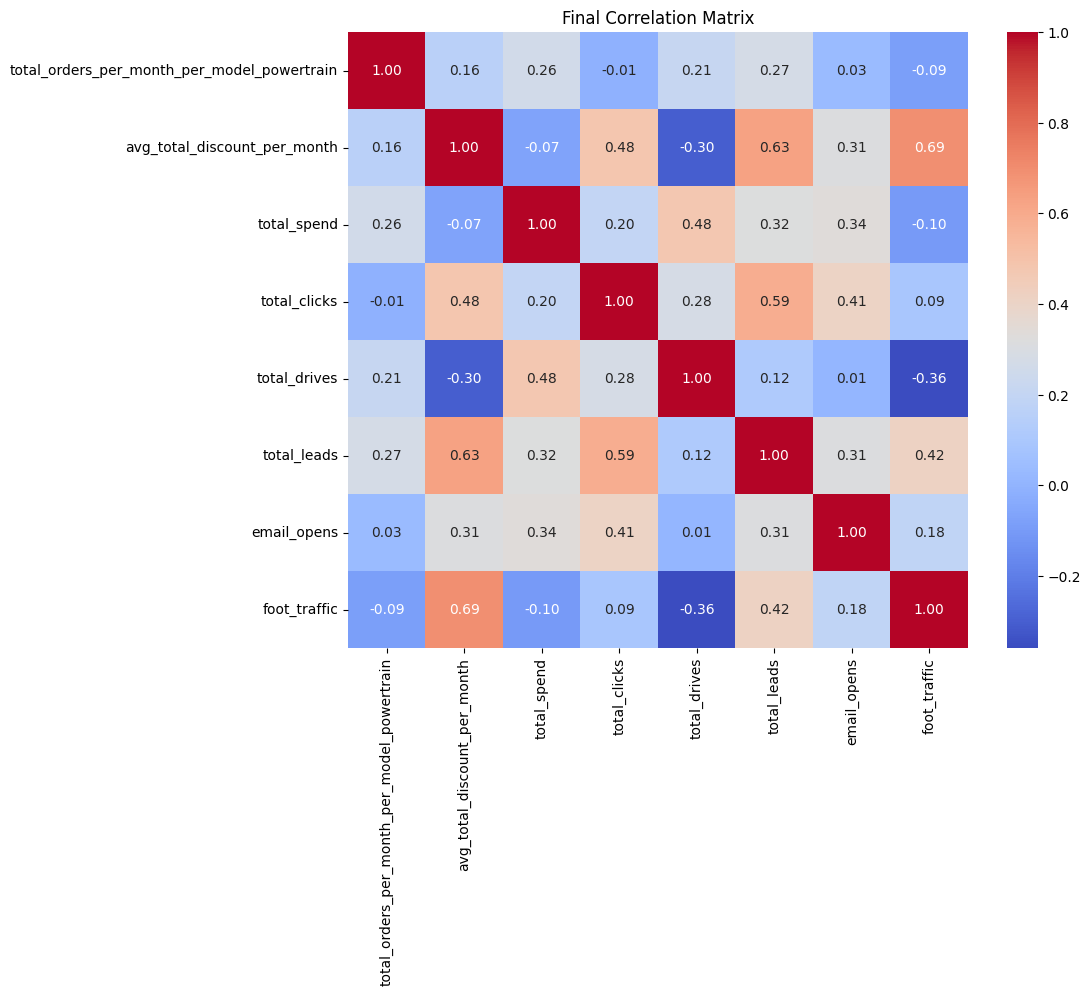

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the date column for correlation calculation
numeric_df = agg_discount_marketing_df.drop('order_month', axis=1)

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Draw the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Final Correlation Matrix')
plt.show()

In [ ]:
import statsmodels.api as sm

# Define your final list of predictor columns
final_predictors = [
    'avg_total_discount_per_month',
    'total_spend',
    'total_clicks',
    'total_drives',
    'total_leads',
    'email_opens',
    'foot_traffic'
]

# Define your Y and X variables
y = agg_discount_marketing_df['total_orders_per_month_per_model_powertrain']
X = agg_discount_marketing_df[final_predictors]

# Add the constant and fit the model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print the final results
print(model.summary())

                                         OLS Regression Results                                        
Dep. Variable:     total_orders_per_month_per_model_powertrain   R-squared:                       0.362
Model:                                                     OLS   Adj. R-squared:                 -0.276
Method:                                          Least Squares   F-statistic:                    0.5671
Date:                                         Fri, 22 Aug 2025   Prob (F-statistic):              0.764
Time:                                                 21:16:58   Log-Likelihood:                -103.97
No. Observations:                                           15   AIC:                             223.9
Df Residuals:                                                7   BIC:                             229.6
Df Model:                                                    7                                         
Covariance Type:                                     nonrobust  

--- Generating Plots for Model Visualization ---


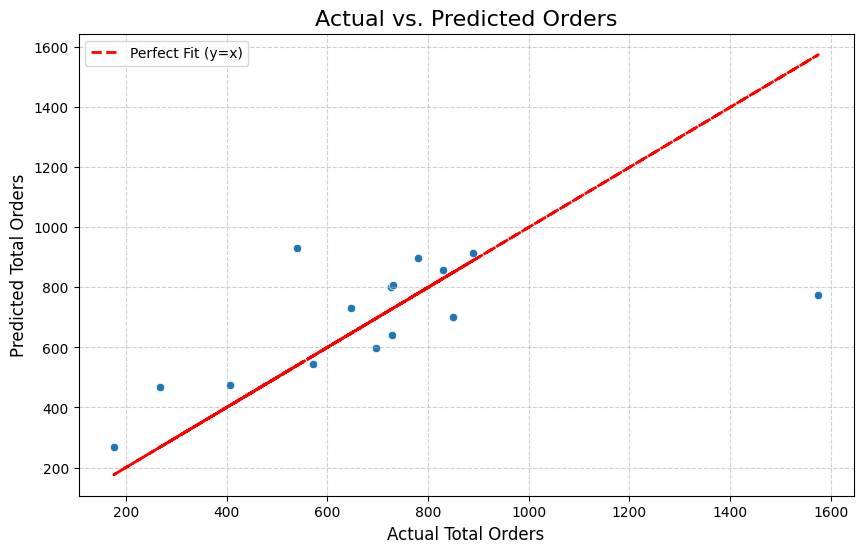

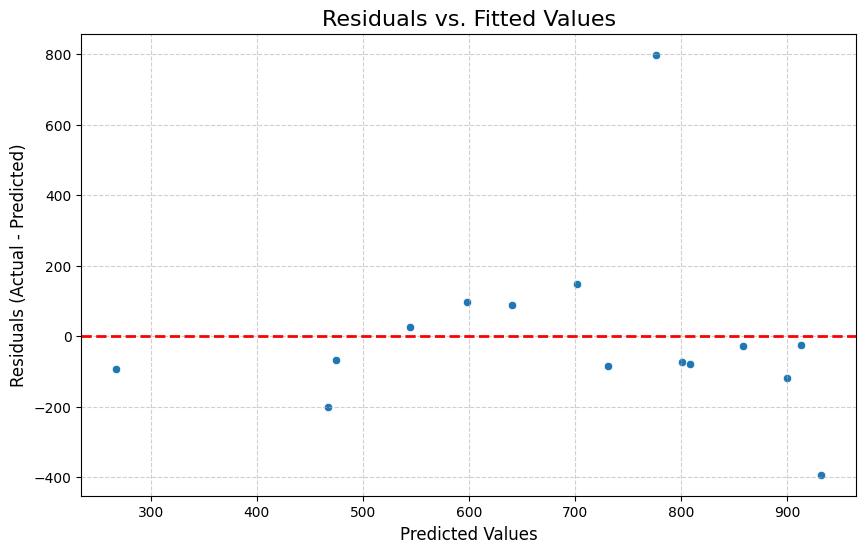

--------------------------------------------------
Plots generated. See above for the Actual vs. Predicted and Residuals plots.


In [ ]:
import pandas as pd # You don't use this, but it's good practice to include if you are working with pandas
import numpy as np # You don't use this, but it's good practice to include if you are working with numpy
import statsmodels.api as sm
import matplotlib.pyplot as plt # CRUCIAL: Imports the plotting library
import seaborn as sns # CRUCIAL: Imports the seaborn library for prettier plots

# Define your final list of predictor columns
final_predictors = [
    'avg_total_discount_per_month',
    'total_spend',
    'total_clicks',
    'total_drives',
    'total_leads',
    'email_opens',
    'foot_traffic'
]

# Define your Y and X variables
y = agg_discount_marketing_df['total_orders_per_month_per_model_powertrain']
X = agg_discount_marketing_df[final_predictors]

# Add the constant and fit the model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print("--- Generating Plots for Model Visualization ---")

# --- Plot 1: Actual vs. Predicted Values ---
# This is the best way to visualize a multiple regression model.
# A perfect model would have all points on the red y=x line.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y, y=model.fittedvalues)
plt.plot(y, y, color='red', linestyle='--', linewidth=2, label='Perfect Fit (y=x)')
plt.title('Actual vs. Predicted Orders', fontsize=16)
plt.xlabel('Actual Total Orders', fontsize=12)
plt.ylabel('Predicted Total Orders', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- Plot 2: Residuals Plot ---
# This plot helps to diagnose if the model's assumptions are met.
# Ideally, residuals should be randomly scattered around zero.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.fittedvalues, y=model.resid)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs. Fitted Values', fontsize=16)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("-" * 50)
print("Plots generated. See above for the Actual vs. Predicted and Residuals plots.")

Last things I would like to incorporate, lag times to marketing spend and seasonality. Let's see what happens then. Maybe 3 month lag time to marketing spend.

This time our R-squared is saying we are able to predict 78.5% of orders with the independent variables we added, but the adjusted R-squared says its 57%. This is a pretty big gap. what do we do now?



If I remove total_leads and foot_traffic from the predictor variables the R-squared is 69% and adjusted r-squaared is 51.8%
- so if i remove these two features that seem multicollinear with the rest of the data, we actually have a worse model since previously adj r squared is 57% while the new model is 51.8%

Lag and confounding variables -> especially lag effect of marketing



Is there an automated way to figure out which predictor variables to use: 
Yes, there are several automated methods for feature selection that are more efficient than manually testing every combination. These techniques are designed to find a good balance between model performance and simplicity.

Here are two of the most common automated approaches.

---



### ## 1. Stepwise Regression



This is a classic statistical approach that automates the iterative process you were doing manually. It builds a model by systematically adding or removing variables based on a specific statistical criterion (like p-value or AIC).

There are three main types:

- **Backward Elimination:**, This is what I previously recommended you do manually. The algorithm starts with a model containing ,**all**, predictor variables. It then removes the least significant variable (the one with the highest p-value) and re-runs the model, repeating this process until all remaining variables are statistically significant.
- **Forward Selection:**, This is the opposite. It starts with a model containing ,**no**, variables. It then adds the single most significant variable. It continues to add the next most significant variable one by one, until adding new variables no longer improves the model.
- **Bidirectional (or Stepwise) Selection:**, This is a hybrid of the two. At each step, it considers both adding a new significant variable and removing an existing insignificant one.

---



### ## 2. Lasso Regression (L1 Regularization)



This is a more modern and powerful machine learning approach that is often preferred.

Lasso Regression works by adding a "penalty" to the model that forces it to be simpler. The key feature of Lasso is that this penalty can shrink the coefficients of unimportant variables all the way **down to exactly zero**.

**How it works for feature selection:**

1. You fit a Lasso regression model to your data.
2. The model automatically assigns coefficients to your variables.
3. Any variable whose coefficient is shrunk to zero is considered unimportant and is effectively removed from the model. The variables left with non-zero coefficients are the ones the model has selected as important.

You can easily implement this using `scikit-learn`.

Pythonfrom sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Assume X and Y are your full set of predictors and target variable

# It's important to scale your data before using Lasso
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and fit the Lasso model
# The 'alpha' parameter controls the strength of the penalty
lasso = Lasso(alpha=1.0) 
lasso.fit(X_scaled, Y)

# See which variables were kept (have non-zero coefficients)
selected_features = pd.DataFrame({'feature': X.columns, 'coefficient': lasso.coef_})
print(selected_features[selected_features['coefficient'] != 0])

---



### ## Recommendation



For most modern applications, **Lasso Regression** is an excellent and robust starting point for automated feature selection. It's efficient and very effective at finding a smaller subset of powerful predictors from a large initial list.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# --- Assume 'agg_discount_marketing_df' is your final merged DataFrame ---
# For this demonstration, I will create a placeholder DataFrame that mimics
# the structure and relationships of your data.
# data = {
#     'month': pd.to_datetime(['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01']),
#     'total_orders_per_month_per_model_powertrain': [2000, 2200, 2500, 2300, 2800, 2600, 3000, 3200],
#     'avg_total_discount_per_month': [1500, 1600, 1800, 1700, 2000, 1900, 2200, 2400],
#     'total_spend': [50000, 55000, 85000, 60000, 90000, 80000, 95000, 100000],
#     'total_clicks': [10000, 12000, 15000, 13000, 18000, 16000, 19000, 21000],
#     'total_drives': [100, 110, 130, 120, 150, 140, 160, 170],
#     'total_leads': [300, 320, 480, 350, 520, 450, 550, 600],
#     'email_opens': [50000, 52000, 58000, 55000, 62000, 60000, 65000, 68000],
#     'foot_traffic': [500, 520, 780, 550, 820, 750, 850, 900]
# }
# agg_discount_marketing_df = pd.DataFrame(data)


# ==============================================================================
# STEP 1: AUTOMATED FEATURE SELECTION WITH LASSO REGRESSION
# ==============================================================================

print("--- Running Step 1: Lasso Regression for Feature Selection ---")

# --- Prepare X and Y variables ---
y = agg_discount_marketing_df['total_orders_per_month_per_model_powertrain']
# Remove any non-numeric columns (e.g., dates/strings) for Lasso
X = agg_discount_marketing_df.drop(['total_orders_per_month_per_model_powertrain'], axis=1)
X = X.select_dtypes(include=[np.number])

# --- Scale the Feature Data ---
# Lasso works best when all variables are on a similar scale.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Fit the Lasso Model ---
# The 'alpha' parameter controls the penalty strength. A higher alpha means
# fewer features will be selected. We'll start with a moderate value.
lasso = Lasso(alpha=100.0)
lasso.fit(X_scaled, y)

# --- Identify and Print Selected Features ---
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': lasso.coef_})
selected_features_df = coefficients[coefficients['coefficient'] != 0]
selected_feature_names = selected_features_df['feature'].tolist()

print("\nFeatures selected by Lasso Regression:")
if not selected_feature_names:
    print("No features were selected. Consider using a smaller alpha value.")
else:
    print(selected_feature_names)

print("\n" + "="*60 + "\n")


# ==============================================================================
# STEP 2: BUILD FINAL OLS MODEL WITH SELECTED FEATURES
# ==============================================================================

if selected_feature_names:
    print("--- Running Step 2: Building Final OLS Model with Selected Features ---")

    # --- Define final Y and X variables ---
    y_final = agg_discount_marketing_df['total_orders_per_month_per_model_powertrain']
    X_final = agg_discount_marketing_df[selected_feature_names]

    # --- Add a constant and fit the final model ---
    X_final = sm.add_constant(X_final)
    final_model = sm.OLS(y_final, X_final).fit()

    # --- Print the final model summary ---
    print("\nFinal Model Summary:")
    print(final_model.summary())
else:
    print("Skipping final model build because no features were selected by Lasso.")

--- Running Step 1: Lasso Regression for Feature Selection ---

Features selected by Lasso Regression:
No features were selected. Consider using a smaller alpha value.


Skipping final model build because no features were selected by Lasso.


the model is still too complex need to cut down



## Phase 1: Build the Best Explanatory Model (80% of the work)

This phase is about creating the most accurate and statistically sound model to describe the historical relationship between your business actions and sales. This is the foundation for everything that follows.

**1. Data Preparation and Aggregation**

- **Action:**, Combine all your raw data (orders, discounts, marketing KPIs) into a single, daily table.
- **Aggregate to Monthly:**, Group the daily data by month to create the final, clean monthly dataset that we've been working with.

**2. Feature Engineering**

- **Action:**, Create new, powerful variables from your existing data.
  - **Aggregate Features:**, Create high-level metrics like ,`total_spend`, and ,`total_clicks`,.
  - **Lagged Variables:**, Create lagged versions of key variables (e.g., ,`spend_lag_1`, for last month's spend) to test for delayed impacts.
  - **Seasonality Dummies:**, Create new columns to capture seasonal effects (e.g., a ,`is_holiday`, column with a ,`1`, for Oct-Dec and ,`0`, otherwise).

**3. Feature Selection**

- **Action:**, Use a combination of methods to select a small, powerful set of non-correlated predictors.
  - **Correlation Matrix:**, Visualize a heatmap to manually identify and remove variables that are highly correlated with each other.
  - **Automated Selection (Lasso):**, Use Lasso Regression with a strong ,`alpha`, to automatically identify the most impactful variables.

**4. Final Model Building and Validation**

- **Action:**, Using the final set of selected features, build your definitive ,**Multiple Linear Regression model**, with ,`statsmodels`,.
- **Validation:**, Evaluate this model thoroughly. The goal is to arrive at a final model equation where:
  - The ,**Adjusted R-squared**, is as high as possible.
  - Every single predictor variable has a ,**p-value less than 0.05**,.
  - The model passes diagnostic tests (e.g., for normality of residuals).

The output of this phase is your final, validated model equation, for example: `Predicted Orders = 1850 + 0.21 * (Discount) + 0.04 * (Spend_Lag_1) + 500 * (is_holiday)`.

## Phase 2: Create the Forecasting Tool

This phase operationalizes your model, turning it from a research project into a practical business tool for scenario planning.

**1. The "What-If" Scenario Tool**

- **Action:**, Your final model equation ,_is_, the tool. It's a calculator where the business provides the inputs (budgets and plans) and the model provides the output (forecasted orders).

**2. Define Inputs**

- **Action:**, Your business team provides their planned actions for the upcoming month. These inputs ,**must match the variables in your final model**,.
  - _Example Inputs for September:_
    - Planned ,`avg_total_discount_per_month`,: ,**$3,000**
    - `spend_lag_1`, (This would be August's actual spend): ,**$75,000**
    - `is_holiday`, (For September): ,**0**

**3. Generate the Forecast**

- **Action:**, Plug the inputs into your final model equation to generate the forecast for next month's orders.
  - _Example Forecast:_, ,`Predicted Orders = 1850 + 0.21*(3000) + 0.04*(75000) + 500*(0) = 5,480`
- **Deliverable:**, You can now tell the business: "Based on our model, a $3,000 average discount and the $75,000 we spent last month will likely result in approximately ,**5,480 orders**, next month."

## Phase 3: Monitor, Maintain, and Retrain

A model's accuracy degrades over time as business conditions change. This phase ensures your tool remains reliable.

**1. Backtesting and Historical Accuracy**

- **Action:**, Before deploying, use your model to generate "predictions" for all your past months. Plot these predictions against the actual historical orders and calculate the ,**Mean Absolute Error (MAE)**,.
- **Deliverable:**, This gives you a clear measure of historical accuracy. "On average, our model's historical predictions have been off by about +/- 150 orders."

**2. Ongoing Performance Monitoring**

- **Action:**, Each month, after the actual sales numbers come in, compare them to your model's forecast.
- **Deliverable:**, Track the model's error over time. Is it getting better or worse? This builds confidence and helps you know when it's time to retrain.

**3. Periodic Retraining**

- **Action:**, Schedule a regular cadence (e.g., every 6 months) to retrain your model on the newest data. This involves re-running the entire process from Phase 1 to ensure the model adapts to any new patterns or changes in your business.

This end-to-end process ensures you not only answer the "why" but also provide a robust, data-driven tool to help the business decide what to do next.



Of course. Here is a step-by-step summary of our entire conversation, from initial analysis to building a final forecasting tool.



### ## Phase 1: Simple Linear Regression (Understanding One Variable)



1. **The Question:**, We started by asking, "Is there a relationship between our average discount and our total orders?"
2. **Visualization:**, The first step was to create a ,**scatter plot**, to visually inspect the relationship between these two variables.
3. **Quantification:**, To prove the relationship statistically, we calculated:
  - **Pearson Correlation (**,`**r**`,**):**, A single number from -1 to +1 measuring the strength and direction of the relationship.
  - **P-value:**, A test to see if the correlation was real or just a random fluke. A p-value < 0.05 means the relationship is ,**statistically significant**,.
4. **Modeling:**, We built our first ,**Simple Linear Regression**, model (,`orders ~ discount`,) to get a predictive equation.
5. **Interpretation:**, We learned to interpret the key outputs:
  - **Coefficient (**,`**coef**`,**):**, The impact of a $1 increase in discount on the number of orders.
  - **R-squared:**, The percentage of the change in orders that is explained by the change in discounts.

---



### ## Phase 2: Multiple Linear Regression (Adding More Variables)



1. **The Need:**, We realized discounts weren't the whole story and decided to add marketing KPIs to build a more powerful ,**Multiple Linear Regression**, model.
2. **Data Preparation:**, We aggregated all the daily marketing KPIs into a single monthly table and created high-level features like ,`total_spend`, and ,`total_clicks`,.
3. **The Problem of Multicollinearity:**, We learned that when predictor variables are highly correlated with each other (e.g., ,`spend`, and ,`clicks`,), it confuses the model.
4. **Detecting the Problem:**, We used a ,**correlation matrix**, and a ,**heatmap**, to visually identify which variables were too highly correlated to be used in the same model.

---



### ## Phase 3: Refining the Model (Finding the Best Predictors)



1. **The Challenge:**, Our first multiple regression model had a large gap between ,**R-squared**, and ,**Adjusted R-squared**,, and many variables had high p-values, making them look insignificant.
2. **The Reason:**, We determined this was caused by ,**multicollinearity**,. Even a business-critical variable like ,`discount`, can appear insignificant if its effect is being "drowned out" by other correlated variables.
3. **The Manual Solution (Backward Elimination):**, The solution is to simplify the model by iteratively removing the single variable with the ,**highest p-value**, (> 0.05) and re-running the model until all remaining predictors are statistically significant.
4. **The Automated Solution (Lasso Regression):**, We learned how to use Lasso Regression, a machine learning technique that automatically selects the most important features by shrinking the coefficients of unimportant ones to zero. We also learned that adjusting the ,`alpha`, parameter controls the strength of this penalty.

---



### ## Phase 4: From Model to Forecasting Tool



1. **The Goal:**, To use our final, validated model to predict orders for future months.
2. **Scenario Planning:**, We learned that the best way to use the model is for ,**scenario planning**,. The business provides inputs for a few realistic budget plans, and the model calculates the forecasted orders for each, allowing for a data-driven decision.
3. **The "Forecast of a Forecast" Problem:**, We addressed the issue that you can't know future values for outcome metrics like ,`foot_traffic`,. The solution is a ,**two-stage model**,:
  - **Driver Models:**, Simpler models that predict intermediate KPIs (e.g., ,`foot_traffic ~ total_spend`,).
  - **Main Model:**, Your final orders model that uses the predictions from the driver models as its inputs.
4. **Managing Uncertainty:**, We concluded that while this adds layers of assumptions, it's a realistic reflection of the business funnel. We manage this uncertainty by providing a ,**prediction interval**, (a forecast range) instead of a single number.
5. **Evaluating Performance:**, Finally, we discussed how to measure the model's historical accuracy by plotting ,**Actual vs. Predicted**, orders and calculating error metrics like ,**Mean Absolute Error (MAE)**,.



## (1) Explore Pricing Data



The below charts show a strong positive relationship between both orders and discounts, and we have calculated correlation between the two as well.



## (2) Explore Marketing Data



## (3) Now that we have determined our variables, we can join together our aggregated data



## Model Performance

Final Equation: 1162.9756+(0.1674∗avg_total_discount_per_month)−(0.0002∗total_clicks)+(0.0200∗total_drives)+(0.0110∗total_leads)+(0.0001∗email_opens)−(0.0012∗foot_traffic)+(5.96e−05∗total_spend)



Overall, to assess this model we can look at the R-squared score and Adjusted R-squared to assess performance

- R-squared is at 0.714, which means the model, using all the variables inputted, can explain 71% of monthly gross orders 
- However, the large drop from an R-squared of ,**71.4%**, down to an Adjusted R-squared of ,**42.9%**, is a ,**major red flag; this indicates overfitting**
  - **This is also likely due to a small number of observations (15 months of GEN-2 orders) and a high number of predictors**





We can next look at the coef scores of each variable input. 

- The strongest coefficient is to avg_total_discount_per_month; the model predicts for every dollar increase in discounts, an increase of 0.17 orders
- Total leads has a coef of 0.011
- Total drives has a coef of 0.02



Interestingly, we can observe some very small coef scores for:

- total_spend (marketing)
- total_clicks
- foot_traffic 



Right now the model is flawed and here are some notes:

- Small sample size; maybe a monthly aggregation is too limited (GEN-2 has existed for only 15 months)
  - Introduce gross order forecast not limited to GEN-2, and/or maybe forecast on a weekly basis?
- Too many predictor variables -> we need to identify which are multicollinear (which ones are correlated with each other rather than independent)
- Perhaps introduce lag effects on marketing related spending (ie. average customer takes 3 months to decide to purchase a vehicle)
- Also do some digging to see if there are any seasonal patterns (ie. EOQ, holidays)
- What is our base demand? If most of our demand was influenced by these inputs how can we get it besides calculating the intercept in a regression model?
- Maybe try a different model like XGBoost or Random Forest

